#Librerias

In [ ]:
pip install mpltools

  Created wheel for mpltools: filename=mpltools-0.2.0-py3-none-any.whl size=35696 sha256=225953abb8224b87f3ed803e748e74dfa573332a4e845817e1a49a473ea22e6c
  Stored in directory: /root/.cache/pip/wheels/db/21/6a/cb60d2b6d5b3b90c68ad3b193057e7af8d12560b433230dac1
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=6271472854e190cbe22d614ff90788bbf0406633c77cc105d51d790872acef7a
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built mpltools configobj


In [ ]:
from IPython.display import display, Math, Markdown
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import math
from mpltools import color

#BlockMeshDict

In [ ]:
#/*--------------------------------*Python3*----------------------------------*\
#  =========                 |
#  \\      /  F inite        | OpenFEO:  blanck
#   \\    /   E lements      | Website:  blanck
#    \\  /    O peration     | Version:  1
#     \\/                    |
#\*---------------------------------------------------------------------------*/
convertToMeters = 1

vertices = [(0,0),(1,0),(2,0),(2,1),(1,1),(0,1)]

edges = [(0,1),(1,2),(2,3),(3,4),(4,5),(0,4),(1,5),(1,3),(2,4),(1,4)]

boundary = [(0,1,1),(5,1,1)]

Run BlockMeshDict

In [ ]:
#@title Funciones

def plot2(vertices,edges,boundary):
  vertx = []
  verty = []
  boundx = []
  boundy = []

  for vi,vj in edges:
    plot = np.vstack((vertices[vj],vertices[vi])).T
    vertx.append(plot[0])
    verty.append(plot[1])
    
  for i in boundary:
    plot = vertices[i[0]]
    boundx.append(plot[0])
    boundy.append(plot[1])
  
  return vertx,verty,boundx,boundy

def dist_ang(vertices,edges):
  
  L = []
  A = []

  for vi,vj in edges:
    dv = vertices[vj]-vertices[vi]
    l = np.linalg.norm(dv)
    L.append(l)
    a = np.arctan2(dv[1],dv[0])
    A.append(a)
  
  L = np.array(L)
  A = np.array(A)
  return L,A

def printmd(array,textprev="",textpost="",transpose=False):
  array = sp.Matrix(array.round(3))
  if transpose:
    display(Markdown("$"+textprev+sp.latex(array.T)+textpost+"$"))
  else:
    display(Markdown("$"+textprev+sp.latex(array)+textpost+"$"))


In [ ]:
#@title Run

vertices = np.array(vertices)*convertToMeters
distances,angles = dist_ang(vertices,edges)

In [ ]:
# Resultados
printmd(distances,"L_{i}=",transpose=True)
printmd(angles*180/np.pi,"\\theta_{i}=",transpose=True)

$L_{i}=\left[\begin{matrix}1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.414 & 1.414 & 1.414 & 1.414 & 1.0\end{matrix}\right]$

$\theta_{i}=\left[\begin{matrix}0.0 & 0.0 & 90.0 & 180.0 & 180.0 & 45.0 & 135.0 & 45.0 & 135.0 & 90.0\end{matrix}\right]$

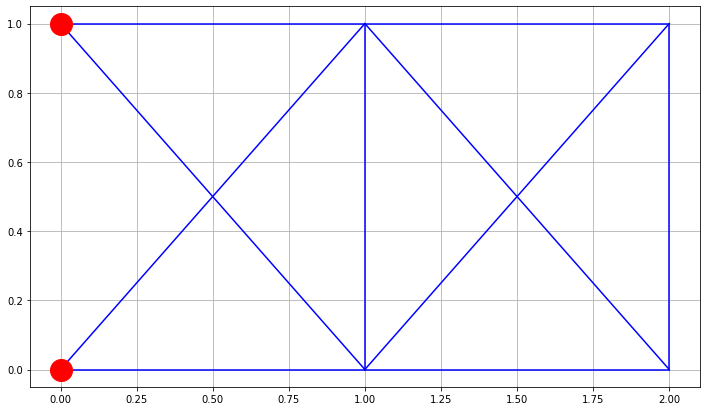

In [ ]:
fig, axes = plt.subplots(figsize=(12,7))
vx,vy,bx,by = plot2(vertices,edges,boundary)

for i in range(len(vx)):
  plt.plot(vx[i],vy[i],"b")

plt.plot(bx,by,"or",markersize=22)
plt.grid()
plt.show()

#Forces

In [ ]:
#/*--------------------------------*Python3*----------------------------------*\
#  =========                 |
#  \\      /  F inite        | OpenFEO:  blanck
#   \\    /   E lements      | Website:  blanck
#    \\  /    O peration     | Version:  1
#     \\/                    |
#\*---------------------------------------------------------------------------*/

scaleF = 10**3

Forces = [(1,0,-10),(2,0,-10)] #(vertice,Fx,Fy) 

#Properties

In [ ]:
#/*--------------------------------*Python3*----------------------------------*\
#  =========                 |
#  \\      /  F inite        | OpenFEO:  blanck
#   \\    /   E lements      | Website:  blanck
#    \\  /    O peration     | Version:  1
#     \\/                    |
#\*---------------------------------------------------------------------------*/

scaleE = 10**9
scaleD = 10**(-3)

E = [200,200,200,200,200,200,200,200,200,200]
D = [20,20,20,20,20,20,20,20,20,20]

#Ki calculate

In [ ]:
Ki = []

scaleK = scaleE*(scaleD**2)/convertToMeters
printmd(np.array([scaleK]),"escala = ")

for i in range(len(distances)):
  ca = np.cos(angles[i])
  sa = np.sin(angles[i])
  ki = E[i]*(np.pi*D[i]**2/4)/distances[i]*np.array([[ca**2,ca*sa],[ca*sa,sa**2]])
  index = f"{edges[i][0]},{edges[i][1]}"
  printmd(ki,"k_{"+index+"}=")
  Ki.append(ki)

$escala = \left[\begin{matrix}1000.0\end{matrix}\right]$

$k_{0,1}=\left[\begin{matrix}62831.853 & 0.0\\0.0 & 0.0\end{matrix}\right]$

$k_{1,2}=\left[\begin{matrix}62831.853 & 0.0\\0.0 & 0.0\end{matrix}\right]$

$k_{2,3}=\left[\begin{matrix}0.0 & 0.0\\0.0 & 62831.853\end{matrix}\right]$

$k_{3,4}=\left[\begin{matrix}62831.853 & 0.0\\0.0 & 0.0\end{matrix}\right]$

$k_{4,5}=\left[\begin{matrix}62831.853 & 0.0\\0.0 & 0.0\end{matrix}\right]$

$k_{0,4}=\left[\begin{matrix}22214.415 & 22214.415\\22214.415 & 22214.415\end{matrix}\right]$

$k_{1,5}=\left[\begin{matrix}22214.415 & -22214.415\\-22214.415 & 22214.415\end{matrix}\right]$

$k_{1,3}=\left[\begin{matrix}22214.415 & 22214.415\\22214.415 & 22214.415\end{matrix}\right]$

$k_{2,4}=\left[\begin{matrix}22214.415 & -22214.415\\-22214.415 & 22214.415\end{matrix}\right]$

$k_{1,4}=\left[\begin{matrix}0.0 & 0.0\\0.0 & 62831.853\end{matrix}\right]$

#K create

In [ ]:
nk = len(vertices)
K = np.zeros((2*nk,2*nk))
Ks = np.zeros((2*nk,2*nk))

for i in range(len(distances)):
  j,k = edges[i]
  K[j*2:j*2+2,j*2:j*2+2]=Ki[i]
  K[k*2:k*2+2,k*2:k*2+2]=Ki[i]
  K[k*2:k*2+2,j*2:j*2+2]=-Ki[i]
  K[j*2:j*2+2,k*2:k*2+2]=-Ki[i]
  Ks = Ks + K
  K = np.zeros((2*nk,2*nk))

printmd(Ks,"\\small K=")

$\small K=\left[\begin{array}{cccccccccccc}85046.268 & 22214.415 & -62831.853 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0\\22214.415 & 22214.415 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0\\-62831.853 & 0.0 & 170092.536 & 0.0 & -62831.853 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0 & -22214.415 & 22214.415\\0.0 & 0.0 & 0.0 & 107260.682 & 0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & -62831.853 & 22214.415 & -22214.415\\0.0 & 0.0 & -62831.853 & 0.0 & 85046.268 & -22214.415 & 0.0 & 0.0 & -22214.415 & 22214.415 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & 85046.268 & 0.0 & -62831.853 & 22214.415 & -22214.415 & 0.0 & 0.0\\0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0 & 85046.268 & 22214.415 & -62831.853 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & -62831.853 & 22214.415 & 85046.268 & 0.0 & 0.0 & 0.0 & 0.0\\-22214.415 & -22214.415 & 0.0 & 0.0 & -22214.415 & 22214.415 & -62831.853 & 0.0 & 170092.536 & 0.0 & -62831.853 & 0.0\\-22214.415 & -22214.415 & 0.0 & -62831.853 & 22214.415 & -22214.415 & 0.0 & 0.0 & 0.0 & 107260.682 & 0.0 & 0.0\\0.0 & 0.0 & -22214.415 & 22214.415 & 0.0 & 0.0 & 0.0 & 0.0 & -62831.853 & 0.0 & 85046.268 & -22214.415\\0.0 & 0.0 & 22214.415 & -22214.415 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & 22214.415\end{array}\right]$

#Forces array

In [ ]:
F = np.zeros((nk*2,1))

ias = []
ifs = []

for force in Forces:
  ia,fxi,fyi = force
  ias.append(ia)
  ifs.append(np.array([[fxi,fyi]]).T)

for i,fi in zip(ias,ifs):
  F[i*2:i*2+2] = fi

printmd(F,"F=")

$F=\left[\begin{matrix}0.0\\0.0\\0.0\\-10.0\\0.0\\-10.0\\0.0\\0.0\\0.0\\0.0\\0.0\\0.0\end{matrix}\right]$

#Displacement Effect

In [ ]:
index = []

for bi in boundary:
  if bi[1]:
    index.append(bi[0]*2)
  if bi[2]:
    index.append(bi[0]*2+1)

print(index)

F_fix = F.copy()
K_fix = Ks.copy()

for i in index:
  F_fix[i]= 0
  K_fix[i,:]=0
  K_fix[i,i]=1

printmd(F_fix,"F=")
printmd(K_fix,"K=")

[0, 1, 10, 11]


$F=\left[\begin{matrix}0.0\\0.0\\0.0\\-10.0\\0.0\\-10.0\\0.0\\0.0\\0.0\\0.0\\0.0\\0.0\end{matrix}\right]$

$K=\left[\begin{array}{cccccccccccc}1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\-62831.853 & 0.0 & 170092.536 & 0.0 & -62831.853 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0 & -22214.415 & 22214.415\\0.0 & 0.0 & 0.0 & 107260.682 & 0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & -62831.853 & 22214.415 & -22214.415\\0.0 & 0.0 & -62831.853 & 0.0 & 85046.268 & -22214.415 & 0.0 & 0.0 & -22214.415 & 22214.415 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & 85046.268 & 0.0 & -62831.853 & 22214.415 & -22214.415 & 0.0 & 0.0\\0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0 & 85046.268 & 22214.415 & -62831.853 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & -62831.853 & 22214.415 & 85046.268 & 0.0 & 0.0 & 0.0 & 0.0\\-22214.415 & -22214.415 & 0.0 & 0.0 & -22214.415 & 22214.415 & -62831.853 & 0.0 & 170092.536 & 0.0 & -62831.853 & 0.0\\-22214.415 & -22214.415 & 0.0 & -62831.853 & 22214.415 & -22214.415 & 0.0 & 0.0 & 0.0 & 107260.682 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0\end{array}\right]$

#Solve Displacement

In [ ]:
scaleU = scaleF/scaleK

U = np.linalg.solve(K_fix,F_fix)*scaleU
printmd(U,"U=","(m)")

$U=\left[\begin{matrix}0.0\\0.0\\0.0\\-0.001\\0.0\\-0.002\\0.0\\-0.002\\0.0\\-0.001\\0.0\\0.0\end{matrix}\right](m)$

#Displacement Plot

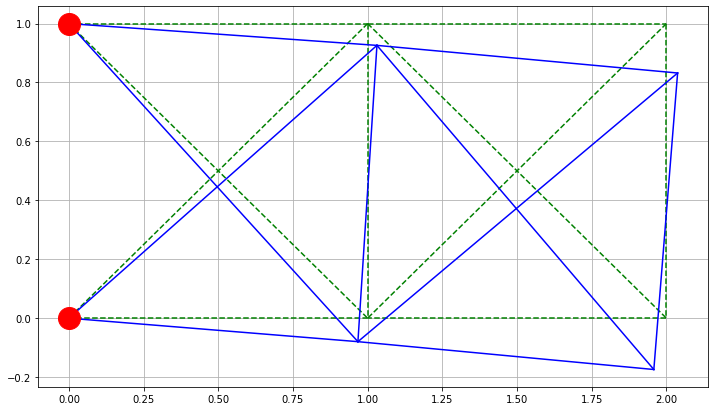

In [ ]:
#@title
scale_factor = 100  #@param {type:"slider", min:1, max:100, step:1}

Uvert = np.zeros((len(vertices),2))

for i in range(len(vertices)):
  Uvert[i,:] = np.reshape(U[2*i:2*i+2],(2))

Dispv = vertices+Uvert*scale_factor

figd, axesd = plt.subplots(figsize=(12,7))
vxd,vyd,bxd,byd = plot2(Dispv,edges,boundary)

for i in range(len(vx)):
  plt.plot(vx[i],vy[i],"--g")

for i in range(len(vx)):
  plt.plot(vxd[i],vyd[i],"b")

plt.plot(bx,by,"or",markersize=22)
plt.grid()
plt.show()

#Reactions

In [ ]:
#@title
K_react = []

for i in index:
  K_react.append(Ks[i,:])

K_react = np.array(K_react)

printmd(K_react,"K_{react}=")

$K_{react}=\left[\begin{array}{cccccccccccc}85046.268 & 22214.415 & -62831.853 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0\\22214.415 & 22214.415 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & -22214.415 & 0.0 & 0.0\\0.0 & 0.0 & -22214.415 & 22214.415 & 0.0 & 0.0 & 0.0 & 0.0 & -62831.853 & 0.0 & 85046.268 & -22214.415\\0.0 & 0.0 & 22214.415 & -22214.415 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -22214.415 & 22214.415\end{array}\right]$

In [ ]:
F_react = K_react@U
printmd(F_react,"R=","(kN) \\quad global \\ coordinates")

$R=\left[\begin{matrix}30.0\\9.536\\-30.0\\10.464\end{matrix}\right](kN) \quad global \ coordinates$

#Efforts

In [ ]:
efforts = []
scaleEff = scaleF/(scaleD**2)

for i in range(len(edges)):
  vi,vj = edges[i]
  ca = np.cos(angles[i])
  sa = np.sin(angles[i])
  qi = np.vstack((U[vi*2:vi*2+2],U[vj*2:vj*2+2]))
  effort = E[i]/distances[i]*np.array([-ca,-sa,ca,sa])@qi
  efforts.append(effort)
  effort = effort*scaleEff/(10**6)
  txt = f"{vi},{vj}"
  printmd(effort,"\sigma_{"+txt+"} =","(MPa)")

efforts = np.array(efforts)

$\sigma_{0,1} =\left[\begin{matrix}-65.137\end{matrix}\right](MPa)$

$\sigma_{1,2} =\left[\begin{matrix}-19.059\end{matrix}\right](MPa)$

$\sigma_{2,3} =\left[\begin{matrix}12.772\end{matrix}\right](MPa)$

$\sigma_{3,4} =\left[\begin{matrix}12.772\end{matrix}\right](MPa)$

$\sigma_{4,5} =\left[\begin{matrix}62.187\end{matrix}\right](MPa)$

$\sigma_{0,4} =\left[\begin{matrix}-42.929\end{matrix}\right](MPa)$

$\sigma_{1,5} =\left[\begin{matrix}47.102\end{matrix}\right](MPa)$

$\sigma_{1,3} =\left[\begin{matrix}-18.062\end{matrix}\right](MPa)$

$\sigma_{2,4} =\left[\begin{matrix}26.953\end{matrix}\right](MPa)$

$\sigma_{1,4} =\left[\begin{matrix}11.297\end{matrix}\right](MPa)$

#Effort Plot

$Tension \ (Azul)\left[\begin{matrix}\end{matrix}\right]$

$Compresion\ (Rojo)\left[\begin{matrix}\end{matrix}\right]$

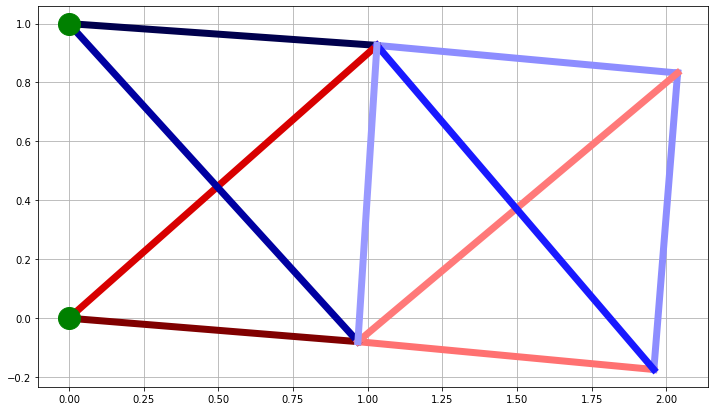

In [ ]:
#@title 
fig, axes = plt.subplots(figsize=(12,7))
vx,vy,bx,by = plot2(vertices,edges,boundary)

normeff = (efforts - np.min(efforts))/np.ptp(efforts)

normeff = normeff.reshape(len(vx),)

map_color = color.color_mapper([0,1], cmap='seismic_r')

printmd(np.array([]),"Tension \\ (Azul)")
printmd(np.array([]),"Compresion\\ (Rojo)")

for i in range(len(vx)):
  plt.plot(vxd[i],vyd[i], color=map_color(normeff[i]),linewidth=7.0)

plt.plot(bx,by,"og",markersize=22)
plt.grid()
plt.show()
